In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import misc, fft, interpolate, optimize
from scipy.interpolate import CubicSpline
from sympy import init_printing
init_printing

<function sympy.interactive.printing.init_printing>

In [3]:
link = "https://docs.google.com/spreadsheets/d/e/2PACX-1vT8btHZ-A6ChzV5Rx_CQmCzbhO10J7R6LvQAyHx9qOCoCDAL9RJgaGUATf2z5lTMo-SjByvrnaX02Cz/pub?output=csv"
df = pd.read_csv(link,';')
df

,Tiempo (ms),"Ángulo 1,"
0,9,"59,289611816406"
1,42,"59,9823265075684"
2,75,"61,2374534606934"
3,108,"63,49247741699"
4,142,"65,3887710571289"
...,...,...
2842,94709,"94,9375762939453"
2843,94743,"96,479850769043"
2844,94776,"97,9406890869141"
2845,94809,"99,3180923461914"


In [4]:
df = df.rename( columns = { 'Tiempo (ms)' : 'Tiempo[ms]', 'Ángulo 1,' : 'Ángulo[Deg]' } )
df

,Tiempo[ms],Ángulo[Deg]
0,9,"59,289611816406"
1,42,"59,9823265075684"
2,75,"61,2374534606934"
3,108,"63,49247741699"
4,142,"65,3887710571289"
...,...,...
2842,94709,"94,9375762939453"
2843,94743,"96,479850769043"
2844,94776,"97,9406890869141"
2845,94809,"99,3180923461914"


In [5]:
df['Tiempo[ms]'] = df['Tiempo[ms]'].apply(float)
df['Ángulo[Deg]'] = df['Ángulo[Deg]'].str.replace(',','.').apply(float)#astype('float64')
df

,Tiempo[ms],Ángulo[Deg]
0,9.0,59.289612
1,42.0,59.982327
2,75.0,61.237453
3,108.0,63.492477
4,142.0,65.388771
...,...,...
2842,94709.0,94.937576
2843,94743.0,96.479851
2844,94776.0,97.940689
2845,94809.0,99.318092


In [6]:
#Método alternativo para convertir las filas de str a float
#Se vectoriza la función eval, y a partir de eso se evalúa en la columna

#eval_= np.vectorize(eval )
#d = eval_(df["AnguloDeg"].str.replace(",", "."))

In [7]:
df['Ángulo[Rad]'] = df['Ángulo[Deg]'].apply( np.deg2rad )
df

,Tiempo[ms],Ángulo[Deg],Ángulo[Rad]
0,9.0,59.289612,1.034799
1,42.0,59.982327,1.046889
2,75.0,61.237453,1.068795
3,108.0,63.492477,1.108153
4,142.0,65.388771,1.141249
...,...,...,...
2842,94709.0,94.937576,1.656973
2843,94743.0,96.479851,1.683891
2844,94776.0,97.940689,1.709387
2845,94809.0,99.318092,1.733428


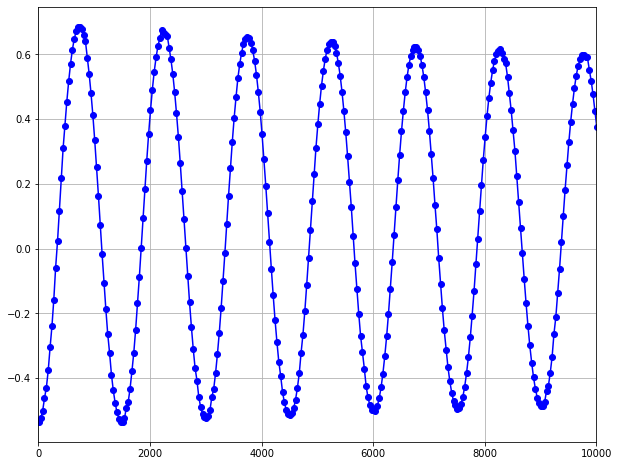

In [8]:
a = df['Ángulo[Rad]'] - np.pi/2

plt.figure( figsize = (10,8) )

plt.plot(df['Tiempo[ms]'], a,'bo-')

plt.xlim(0,10000)

plt.grid()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  """Entry point for launching an IPython kernel.


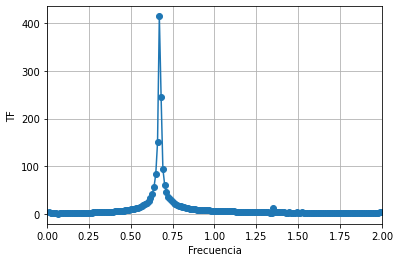

In [9]:
tf = fft(df['Ángulo[Rad]'].values)
T = 33E-3 #Paso del tiempo
N = len(df['Tiempo[ms]'])
xf = fft.fftfreq(N, T)[:N//2]

plt.plot(xf[1:N//2], np.abs(tf[1:N//2]),"o-")
plt.ylabel("TF")
plt.xlabel("Frecuencia")
plt.xlim(0, 2)

plt.grid()

(0.25, 1.0)

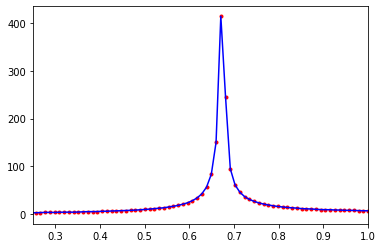

In [10]:
cs = CubicSpline(xf[1:N//2], np.abs(tf[1:N//2]))

plt.plot(xf[1:N//2], np.abs(tf[1:N//2]),"r.")
plt.plot(abs(xf[1:N//2]), abs(cs(xf[1:N//2])),"b" ) 
plt.xlim(0.25, 1)

In [12]:
cs = CubicSpline(xf[1:N//2], np.abs(tf[1:N//2]))
min = optimize.fmin_powell(cs, 0.2)

Optimization terminated successfully.
         Current function value: 0.842280
         Iterations: 3
         Function evaluations: 53


In [13]:
abs(cs(min))

0.8422796094441787

In [14]:
min

array(0.06480543)

In [18]:
cs_n = CubicSpline(xf[1:N//2], -np.abs(tf[1:N//2]))
max = min = optimize.fmin_powell(cs_n, 0.2)

Optimization terminated successfully.
         Current function value: -417.867925
         Iterations: 2
         Function evaluations: 44


In [19]:
abs(cs(max))

417.8679246313184

In [20]:
deriv = np.vectorize( misc.derivative )

In [26]:
der = deriv( cs_n, max, dx=0.000001 )
float(der)

-1.2278178473934531e-05